In [1]:
import numpy as np
import matplotlib.pyplot as plt

There various methods to generate the momentum operator:
1. Using the basic definition of $P$ in the $X$ space. -> $\hat{P} = -i\hbar \frac{d}{dx}$
2. Using the Translation operator. namingly $T = \exp{\frac{-iPa}{\hbar}} => P = \frac{\hbar}{-ia} ln (T)$

The x space is from -5 to 5 with 1001 sites. =>
$n = 1001, a = \frac{10}{1000}, \hbar = 1$

In [2]:
n = 1001
a = 10 / 1000

First lets try making the x space operator which is trivial in the x space. it returns the position.

In [3]:
# creating the X space operator
X = np.diag(np.linspace(-5, 5, n))
X = np.asmatrix(X)

# Method 1

$\frac{d}{dx} = \frac{f(x + a)- f(x - a)}{2a}$

In [4]:
P_1 = np.eye(n, k=1) - np.eye(n, k=-1)    # f(x+a) - f(x-a)
P_1[n-1, 0] = 1       # periodic boundary conditions
P_1[0, n-1] = -1      # periodic boundary conditions
P_1 = -1j * P_1 / (2 * a)     # the denominator in the division
P_1 = np.asmatrix(P_1)
P_1

matrix([[0. -0.j, 0.-50.j, 0. -0.j, ..., 0. -0.j, 0. -0.j, 0.+50.j],
        [0.+50.j, 0. -0.j, 0.-50.j, ..., 0. -0.j, 0. -0.j, 0. -0.j],
        [0. -0.j, 0.+50.j, 0. -0.j, ..., 0. -0.j, 0. -0.j, 0. -0.j],
        ...,
        [0. -0.j, 0. -0.j, 0. -0.j, ..., 0. -0.j, 0.-50.j, 0. -0.j],
        [0. -0.j, 0. -0.j, 0. -0.j, ..., 0.+50.j, 0. -0.j, 0.-50.j],
        [0.-50.j, 0. -0.j, 0. -0.j, ..., 0. -0.j, 0.+50.j, 0. -0.j]])

# Method 2
Here things get a little complicated. First let's create the shift operator...

The shift operator shifts each component of a state, to the right by one state. For example:
$a_1$ takes the place of $a_2$ and so on and for periodic boundary conditions, $a_n$ takes the 
place of $a_1$ meaning that it shifts the state by $a = \frac{10}{1000}$

In [5]:
# starts making shift_op
shift_op = np.eye(n, k=1)
shift_op[n-1, 0] = 1
shift_op = np.asmatrix(shift_op)
shift_op
# done

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.]])

Now, in order to perform the division we need to diagonalize the translation operator and 
turn it back again.

$T' = U T_d U^\dagger$
where $U$ is the eigen-states put together and $T_d$ is the diagonalized translation operator

Then, we perform the division using the `np.angle()` method in numpy.

In [6]:
# diagonalizing the shift operator in order to make the P operator
val, vec = np.linalg.eig(shift_op)
vecdag = vec.H    # U dagger

P_2 = vec * np.diag(np.angle(val)) * vecdag / a  # shift_prime = vec * np.diag(val) * vecdag
# done

P_2

matrix([[-2.60208521e-16+2.11091083e-18j,
         -1.30104261e-16-1.00000164e+02j,
         -1.30104261e-16+5.00003283e+01j, ...,
         -1.73472348e-16+3.33338258e+01j,
         -4.33680869e-17-5.00003283e+01j,
          8.67361738e-17+1.00000164e+02j],
        [ 1.73472348e-16+1.00000164e+02j,
          4.33680869e-17+1.36402501e-16j,
         -8.67361738e-17-1.00000164e+02j, ...,
         -2.16840434e-16-2.50006567e+01j,
          4.33680869e-17+3.33338258e+01j,
          1.73472348e-16-5.00003283e+01j],
        [-1.30104261e-16-5.00003283e+01j,
         -8.67361738e-17+1.00000164e+02j,
          1.73472348e-16+2.68941555e-16j, ...,
         -1.30104261e-16+2.00008208e+01j,
          1.30104261e-16-2.50006567e+01j,
          8.67361738e-17+3.33338258e+01j],
        ...,
        [-8.67361738e-17-3.33338258e+01j,
         -2.60208521e-16+2.50006567e+01j,
          0.00000000e+00-2.00008208e+01j, ...,
         -4.33680869e-16-4.98791165e-17j,
         -4.33680869e-17-1.00000164e+02j

# Time for a test of performance
Now let's try the results of our two methods.

Let's generate the eigen states of the 3 lowest energies of the 1D Quantum Harmonic Oscillator.

$H = \frac{\hat{P}^2}{2m} + \frac{1}{2}m\omega^2 \hat{X}^2$

$\hbar = 1, \omega = 1, m = 1$

Note that we plot $|<\psi|\psi>|^2$

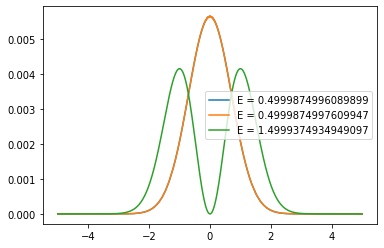

In [7]:
# generating the hamiltonian with the momentum operator
# from the first method
H = P_1 ** 2 / 2 + X ** 2 / 2

# diagonlizing with "eigh" that sorts the eigen
# states from the lowest eigen value to the highest
vals, vecs = np.linalg.eigh(H)

# plot the 3 lowest eigen states
for i in range(3):
    plt.plot(np.diag(X), np.absolute(np.array(vecs)[:, i]) ** 2,
            label=f"E = {vals[i]}")
plt.legend()
plt.show()

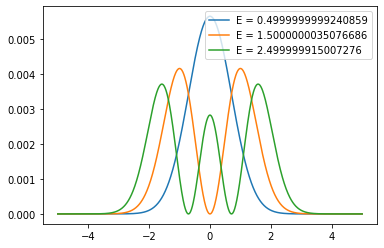

In [8]:
# generating the hamiltonian with the momentum operator
# from the first method
H = P_2 ** 2 / 2 + X ** 2 / 2

# diagonlizing with "eigh" that sorts the eigen
# states from the lowest eigen value to the highest
vals, vecs = np.linalg.eigh(H)

# plot the 3 lowest eigen states
for i in range(3):
    plt.plot(np.diag(X), np.absolute(np.array(vecs)[:, i]) ** 2,
            label=f"E = {vals[i]}")
plt.legend()
plt.show()

# Conclusion
Some of you might think that the 1st method is easier so it's better. But as we can see above, the
eigen states created using the 1st method are 2 fold degenerate. This degeneracy comes from the
definition of the 1st method. All we do in the second method is to make the a momentum operator 
that is **non-degenerate**!